<a href="https://colab.research.google.com/github/merinjv/CS301/blob/main/Bitcoin_Value_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collection
- Gather data to store in GDrive via Yahoo Finance Python Library ([here](https://www.analyticsvidhya.com/blog/2021/06/download-financial-dataset-using-yahoo-finance-in-python-a-complete-guide/))

In [4]:
!pip install yfinance

import pandas as pd
import yfinance as yf


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
class Training:
  container = {
    'btc_daily_open':pd.DataFrame(),
    'btc_daily_high':pd.DataFrame(),
    'btc_daily_low':pd.DataFrame(),
    'btc_daily_close':pd.DataFrame(),
    'btc_daily_adj_close':pd.DataFrame(),
    'btc_daily_vol':pd.DataFrame()
  }
 
  def get_values():
    return container

btc_daily = yf.download(tickers='BTC-USD', interval='1d', period='max')

# Move date-index column into a usable column
btc_daily.reset_index(inplace=True)

# Renames new date column into ds for FB Prophet
btc_daily = btc_daily.rename(columns={'Date': 'ds'})

# Splits data based on date
btc_daily_training = btc_daily.loc[btc_daily['ds'] < '2021-11-01']
btc_daily_test = btc_daily.loc[btc_daily['ds'] > '2021-10-31']

# Adds training data with changed column name for Prophet into corresponding Training class variable
for a, q in enumerate(Training.container.keys()):
  col_name = list(btc_daily)[1:][a]
  Training.container[q] = btc_daily_training[['ds',col_name]].rename(columns={col_name: 'y'})


[*********************100%***********************]  1 of 1 completed


# Twitter API


In [1]:
import datetime

# BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAADmjVwEAAAAA9cYNs7gJ%2BKJN2mAOTTIoeR6TlG4%3DtAKJiOfGl5gCXDZg35e2AaatV0Xzb84fdOhqqdK8xotGabjGgE"

# def search_twitter(query, tweet_fields, bearer_token = BEARER_TOKEN, start_time, max_results):
#   headers = {"Authorization": "Bearer {}".format(bearer_token)}
#   url = "https://api.twitter.com/2/tweets/search/recent?query={}&{}".format(query, tweet_fields, start_time, max_results)
#   response = requests.request("GET", url, headers=headers)
#   print(response.status_code)
#   if response.status_code != 200:
#     raise Exception(response.status_code, response.text)
#   return response.json()

# START_DATE = "2021-11-01T00:00:00"
# MAX_RESULTS = 10
# query = "bitcoin OR crypto OR digitalcurrency"
# tweet_fields = "tweet.fields=text,author_id,created_at"
# json_response = search_twitter(query=query, tweet_fields=tweet_fields, bearer_token=BEARER_TOKEN, start_time=START_DATE, max_results=MAX_RESULTS)
# print(json.dumps(json_response, indent=4, sort_keys=True))

In [2]:
'''
import os
!pip install twint
!pip uninstall twint -y
!git clone --depth=1 https://github.com/twintproject/twint.git
%cd twint/
!pip3 install . -r requirements.txt
%cd ..
'''

!pip install twint
!pip3 install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint
!pip install -qq whatthelang

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 263 kB 7.4 MB/s 
     |████████████████████████████████| 382 kB 48.1 MB/s 
     |████████████████████████████████| 288 kB 43.9 MB/s 
     |████████████████████████████████| 49 kB 6.2 MB/s 
     |████████████████████████████████| 59 kB 6.5 MB/s 
     |████████████████████████████████| 139 kB 40.4 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Created wheel for twint: filename=twint-2.1.20-py3-none-any.whl size=33929 sha256=b8a1c736eca3145ec23087f06c711caa22ebb75130cf8499ae72809df34cdddb
  Stored in directory: /root/.cache/pip/wheels/44/fc/77/99887a36b5c265a87516158858697d1a0b8f32c4d4dbddbb24
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=5c44940565366c4973eb72ae71288101afe7bf284129fe5152e94d904e870c72
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9

In [7]:
!pip install nest-asyncio==1.5.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import twint
import time
import nest_asyncio
nest_asyncio.apply()

In [9]:
users_list = ["APompliano", "ErikVorhees", "TyDanielSmith", "ToneVays", "CryptoCobain", "Tyler", "VitalikButerin", "CryptoWendyO", "StackingUSD", "Girlgone_Crypto", "EuclidAndOaks", "CryptoEuclid", "Mysticaloaks", "davidgokhshtein", "justinsuntron", "IvanOnTech", "KennethBosak", "CryptoBrekkie", "ScottMellker", "TheCryptoDog", "Bitboy_Crypto", "DanHeld", "PeterMcCormack", "LayahHeilpern", "coinboundio"]
df_list = []
for i in users_list:
  #time.sleep(5.0)
  c = twint.Config()
  c.Store_object = True
  c.User_full = True
  c.Username= i
  c.Limit = 3200
  c.Since = '2014-09-17 00:00:00'
  c.Until= '2021-11-27 00:00:00'
  c.Custom["tweet"] = ["id"]
  c.Custom["user"] = ["bio"]
  c.Pandas = True
  c.Search = "bitcoin OR crypto OR digitalcurrency"
  c.Lang = 'en'
  twint.run.Search(c)
  time.sleep(1)
  df_list.append(twint.storage.panda.Tweets_df)


CRITICAL:root:twint.get:User:'NoneType' object is not subscriptable
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 1.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 8.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 27.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 64.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 125.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 216.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 343.0 secs


KeyboardInterrupt: ignored

In [1]:
new_df = pd.concat(df_list, axis=0)
new_df.reset_index(drop=True, inplace=True)
new_df.head(10)

NameError: ignored

In [ ]:
df = new_df
#extract year,month,day into new columns from datetime column
df['year']=pd.to_datetime(df['date']).dt.strftime('%Y')
df['month']=pd.to_datetime(df['date']).dt.strftime('%m')
df['day']=pd.to_datetime(df['date']).dt.strftime('%A')
df.head()


In [ ]:
import re
def preprocess_tweets(tweet):
    
    translation={39:None}
    processed_tweet = tweet
    processed_tweet=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split())
    return(processed_tweet)
df['Processed Tweet'] = df['tweet'].apply(lambda x: preprocess_tweets(x.lower()))

In [ ]:
pip install textblob

In [ ]:
from textblob import TextBlob
df['polarity'] = df[df['language']=='en']['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['sentiment'] = df['polarity'].apply(lambda x: 'positive' if x > 0 else('negative' if x<0  else 'neutral'))
df

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6,5))
plt.title('Classification of All tweets into sentiment categories',fontsize=15)
plt.ylabel('Percentage [%]',fontsize=18)
ax = (df.sentiment.value_counts()/len(df)*100).plot(kind="bar", rot=0,color=['#04407F','#0656AC','#0A73E1'])
ax.set_yticks(np.arange(0, 110, 10))
plt.grid(color='#95a5a6', linestyle='-.', linewidth=1, axis='y', alpha=0.7)
ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(df)/100)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

# Prophet

In [ ]:
def sent(polarity):
  return (int(polarity)+1)/(1+1)

sentiment_df = Training.container['btc_daily_open']['ds']
sentiment_df['polarity'] = df.groupby(["date"]).polarity.sum().reset_index()

sentiment_df['sentiment'] = sentiment_df['polarity'].apply(sent)
sentiment_df.head()

In [ ]:
!pip install Prophet
from prophet import Prophet

all = []
for i in Training.container:
  m = Prophet()
  m.fit(Training.container[i])
  future = m.make_future_dataframe(periods=30)
  forecast = m.predict(future)
  
  print(i)
  print(m.plot(forecast))

  all.append(forecast)

In [ ]:
all = []
for i in Training.container:
    Training.container[i]['sentiment'] = sentiment_df['sentiment']
    print(Training.container[i].head(20))
    m = Prophet()
    m.add_regressor('sentiment')
    m.fit(Training.container[i])
    
    future = m.make_future_dataframe(periods=30)
    
    forecast = m.predict(future)

    print(i)
    print(m.plot(forecast))
    all.append(forecast)

#Predictor Documentation

&quot;Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.&quot; ([From the official Prophet GitHub page](https://facebook.github.io/prophet/))

Prophet is an open-source program developed by Facebook in 2017, and it is currently implemented in R and Python. Prophet&#39;s main function is to make a predictive model from time series data, especially time series that revolve around seasonal effects. The official site boasts about it&#39;s quick and accurate model development, it&#39;s ability to adjust to holidays and other seasonal effects, and it&#39;s ability to handle outliers and shifts in data.

The goal of Prophet is to take a time series, and make a predictive model based on the data given as well as historical factors. An example given by FaceBook is trying to predict traffic for the Wikipedia page of NFL superstar quarterback Peyton Manning. They took around a decade&#39;s worth of daily page visits from the site and used Prophet to predict the trend for the upcoming year.

The first thing they did after importing the data was create a Prophet object and fit the data to it. The data given had an index, a date in the form of YYYY-MM-DD, and a y. When the data is fit, they made a prediction for the future using the following code:

`future = m.make\_future\_dataframe(periods=365)`

This creates 365 new entries in the model. Specifically, it creates 365 future dates for the model to predict for. The prediction hasn&#39;t started yet, though. It just created the data so we can make a prediction. We do this with the following code:

```
forecast = m.predict(future)

forecast[[&#39;ds&#39;, &#39;yhat&#39;, &#39;yhat\_lower&#39;, &#39;yhat\_upper&#39;]].tail()
```
The first line of code uses the model to predict all of the future dates we added previously. It looks at the previous data and looks for seasonal trends. In this example, the largest amount of traffic happens from the late summer of one year until early winter of the next year. This makes sense; after all, that is when the football season occurs, and we are looking at the wikipedia page of a football superstar. It also explains why the lowest amount of traffic happens in the spring and summer, since that is when the off season of football occurs.

The second line displays the end of the table, which will show the last few predicted values that Prophet created. It shows the date, the yhat, the yhat lower value, and the yhat upper value. This is one of the ways that Prophet accounts for outliers. Any data points slightly above average will fall in the margin between yhat upper and yhat. Any data points slightly below average will be covered by a margin below yhat lower that is about the same width as the distance between yhat and yhat lower. Yhat and yhat lower cover the average cases.

After everything is generated, we can use the custom Prophet plotter to plot our data. This is done using this code:

`fig1 = m.plot(forecast)`

With this, we can now see the generated graph:

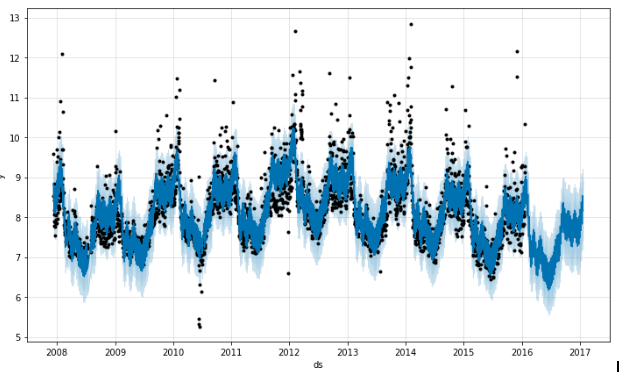

In this graph, the points from 2008 to 2016 represent the yhats that our data provided. The dark blue area represents the yhat margin, while the light blue areas above and below the yhat area represent the yhat upper and lower margins respectively.

The appeal of prophet is not only the fact that it is relatively easy to use, but the fact that it does a good job accounting for seasonal changes. As we can see in the prediction part of the graph, the part from 2016 to 2017, it looks similar to the shape of the graph in the previous years. It goes down when football is in it&#39;s off season, then goes back up once the football season begins.

That being said, while it accounts for some outliers, it cannot cover all outliers. An example of this is the many points well above the yhat upper margin at the start of 2014. This makes sense in real life, as Peyton Manning led the Denver Broncos through the playoffs and to a Superbowl win. Of course traffic for his Wikipedia page will increase when he is actively playing during the time period when football is most actively watched. However, since the model can&#39;t predict how well Peyton Manning will do in a given year, it cannot cover these points.

That being said, Prophet does a good job capturing the overall trend. It figured out the most active seasons the Peyton Manning Wikipedia page had and was able to make an accurate prediction using it.

For our project, we used it similarly. Since our goal was to predict the Bitcoin value, we made a model using previous bitcoin values. We then used the polarity of tweets in order to better calculate the true relevance of bitcoin on a given day. In the end, we generated the model below:

![](RackMultipart20211213-4-twm6u6_html_528057c31d774781.png)

As you can see, the graph generally catches the shape of the model, however due to how volatile bitcoin can be, the graph has a low margin for yhat and does not catch outliers very well. We only predicted the next thirty days of the model, which is the little sliver with no dots you see at the end. It predicts that the price will go up, which could be true. However, due to how volatile bitcoin is, it is not wise to use this model as a real predictor, since the price can greatly rise or fall due to outside factors we did not consider for this assignment.

In conclusion, Prophet is a great tool for predicting time series models. It is fast, generally handles outliers well, and uses patterns in seasons to make accurate predictions. If used correctly, you can create a prediction quickly and accurately.